# Measurement of events from $^{252}$Cf fission
$^{252}$Cf source activity is 5 uCi when purchased on Jul-1,2021

last edit Dec-21,2021

events collected using 
/Users/erezcohen/Desktop/Software/TOFPET2/PETsysAnalysis/CPP/PETsysEventAnalyzer

## definitions

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/TOFPET2/PETsysAnalysis/Python/'); 
from my_tools               import *; 
from plot_tools             import *;
from my_data_analysis_tools import *;
from PETsys_analysis_tools  import *;

%config InlineBackend.figure_format = 'retina'
main_data_path = '/Users/erezcohen/Desktop/data/PETsys/BoxSi_proto2.2/vth_1PE/'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [2]:
data_path = '/Users/erezcohen/Desktop/data/PETsys/BoxSi_proto2.2/vth_1PE/Cf252_data/'

In [3]:
dT = 100; # sec

In [4]:
# Fit a Gaussian to find the system die-away time
def dieaway_function(t,lambda_dieaway,N0,t_dieaway=1):
    
    '''
    exponential decay as a funciton of time (die-away)
    
    t_dieaway is a the time in which the correlation signal starts to decay    
    (before t_dieaway, the Rosi-alpha is independent of time since all events are correlated)    
    '''
    
    return N0*np.exp(-lambda_dieaway*(t-t_dieaway))

## Rossi-$\alpha$ distribution


In [5]:
time_differences_ms = pd.read_csv(data_path + 'Cf252_%d_sec_time_differences.csv'%dT,)

In [6]:
dt_ms_max = 2;
dt_ms_arr = np.array(time_differences_ms['dt[ms]'])
print(len(dt_ms_arr),'time differences from %d sec.',dT)
print('np.min(dt_ms_arr):%.7f,np.max(dt_ms_arr):%.7f'%(np.min(dt_ms_arr),np.max(dt_ms_arr)))
dt_ms_arr

2369520 time differences from %d sec. 100
np.min(dt_ms_arr):0.0000000,np.max(dt_ms_arr):10.0000000


array([1.37157 , 2.3691  , 3.09719 , ..., 0.940032, 1.46479 , 0.524761])

In [7]:
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)

/var/folders/42/n5_htl9n34j9wpgd5rqsnmv40000gn/T/ipykernel_41751/2534985811.py:1: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)


/var/folders/42/n5_htl9n34j9wpgd5rqsnmv40000gn/T/ipykernel_41751/1405862043.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


saved /Users/erezcohen/Desktop/Projects/FNMC/BoxSi/papers/BoxSi_p2.2_NIM_paper/Figures/RossiAlpha_Cf252_100sec.pdf


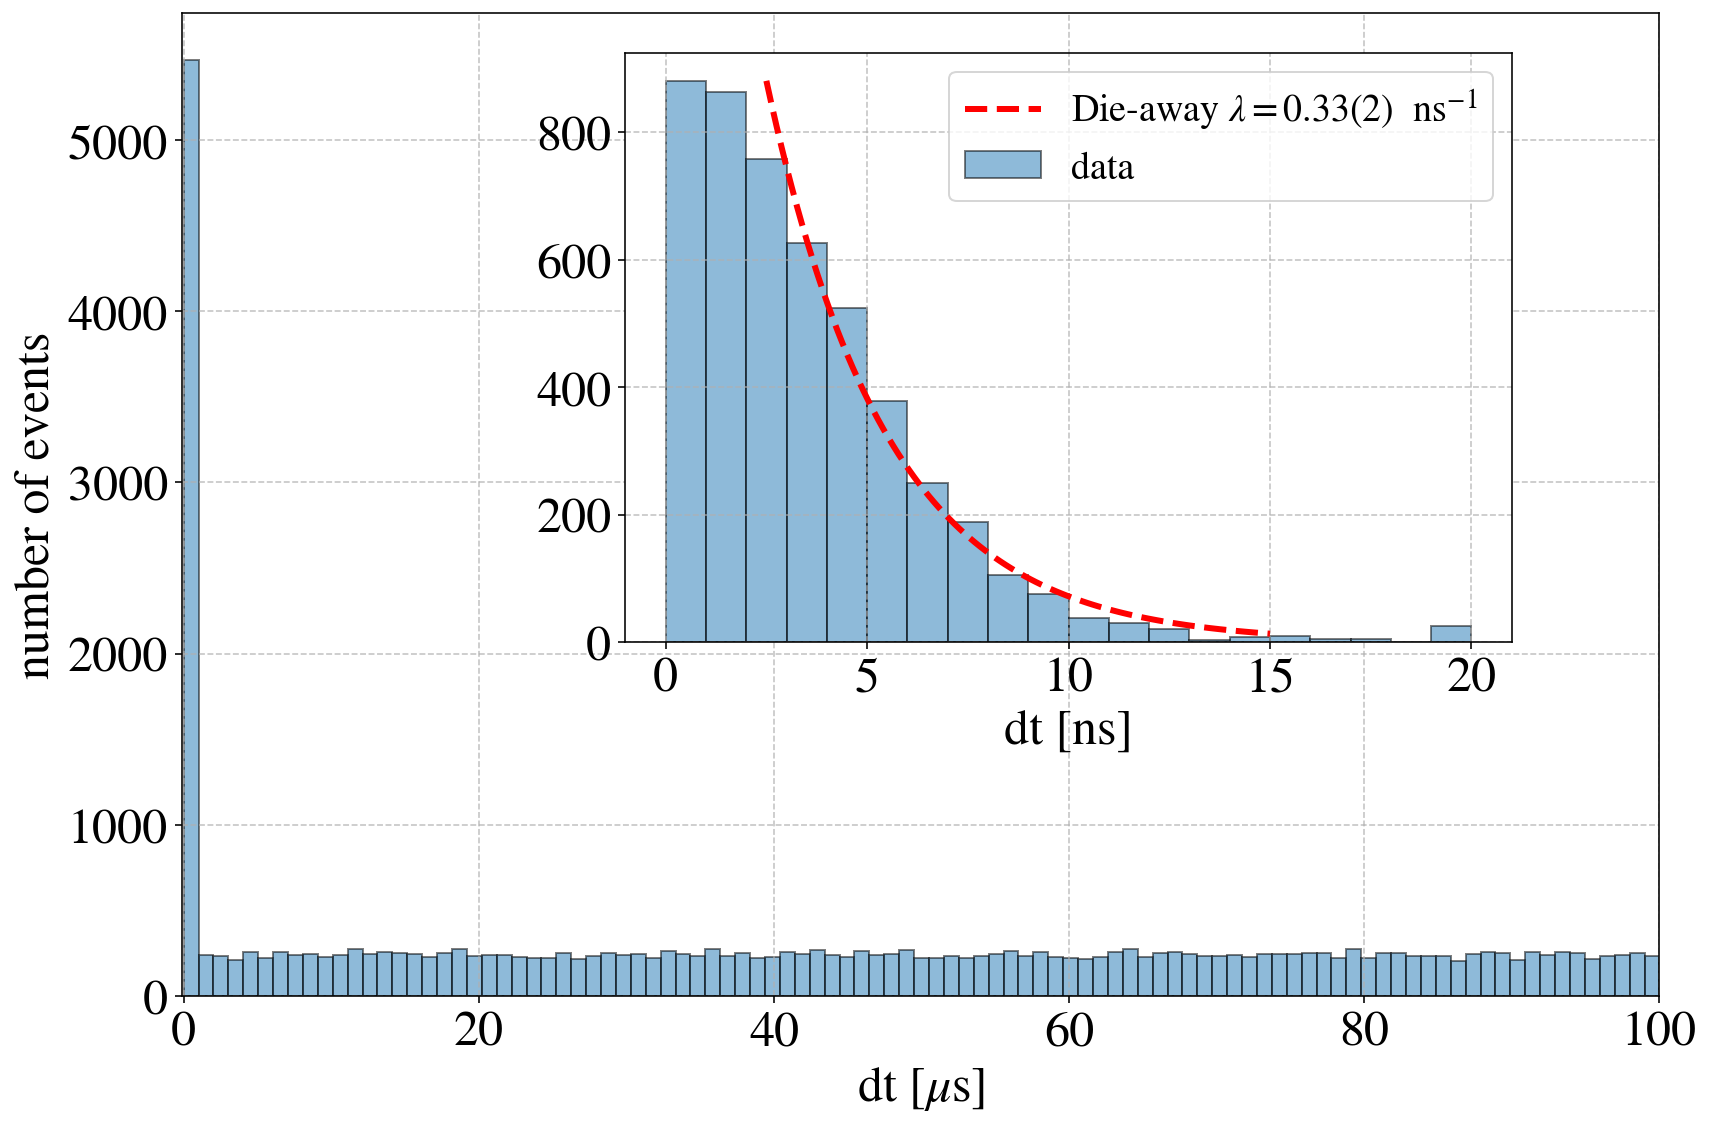

In [17]:
fig=plt.figure(figsize=(12,8));

ax1=fig.add_subplot(1,1,1)
plt.hist( dt_ms_arr*1e3 , bins=np.linspace(0,100,100), edgecolor='k',alpha=0.5);
set_axes(ax1,'dt [$\mu$s]','number of events',do_add_grid=True,xlim=(-0.1,100))

# Create a set of inset Axes: these should fill the bounding box allocated to
# them.
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.3,0.36,0.6,0.6])
ax2.set_axes_locator(ip)

# ax=fig.add_subplot(1,1,1)
h,bins,patches=ax2.hist( dt_ms_arr*1e6 , bins=np.linspace(0,20,21),
                        label='data', edgecolor='k', 
                        alpha=0.5);

tau_dieaway        = 3 # ns
t_dieaway          = 2.5 # die-away starts after this time
t_fit              = np.linspace(t_dieaway,15,100)
lambda_dieaway     = 1./tau_dieaway;
lambda_dieaway_err = lambda_dieaway*0.05;

# lambda_PD     = 1./tau_PD;
# lambda_PD_err = lambda_PD*0.05;

N0 = h[0]
ax2.plot(t_fit,dieaway_function(t_fit,lambda_dieaway,N0,t_dieaway),'--r',linewidth=3,
         label='Die-away $\lambda=%.2f(%.0f)$  ns$^{-1}$'%
         (lambda_dieaway,lambda_dieaway_err*100))
set_axes(ax2,'dt [ns]','',do_add_grid=True,
         xticks=(0,5,10,15,20),do_add_legend=True)
ax2.legend(fontsize=19)

# ax.set_yscale('log')
plt.tight_layout()
save_figure(filename='/Users/erezcohen/Desktop/Projects/FNMC/BoxSi/papers/BoxSi_p2.2_NIM_paper/Figures/RossiAlpha_Cf252_100sec.pdf')